In [1]:
import pandas as pd


df = pd.read_parquet('habr_articles_parsed_final.parquet', engine='pyarrow')

Размер изначального датасета:

In [2]:
df.shape

(285499, 15)

Посмотрим на сам датасет в первом приближении:

In [3]:
df.head()

,Title,Author,Publication_date,Hubs,Tags,Content,Comments,Views,URL,Reading_time,Images_links,Individ/Company,Rating,Positive/Negative,Bookmarks_cnt
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик.\nТак ка...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0
1,Как я работал по два часа в день,Konovalov,2009-07-30 13:50:03+00:00,GTD,"тайм-менеджмент, timemanagement, работа, эффек...",Когда я только перешёл от офисной работы к дом...,99,21000,https://habr.com/ru/articles/65783/,3.0,,individual,193,positive,114.0
2,Итоги первой недели,Irokez,2009-05-10 13:43:21+00:00,GTD,"тайм-менеджмент, пинарик, ворктрек","Итак, за прошедшую неделю хабраюзеры попробова...",29,1000,https://habr.com/ru/articles/59272/,1.0,https://habrastorage.org/r/w1560/getpro/megamo...,individual,15,positive,5.0
3,Правильно поставленная задача время бережет,object,2009-05-05 00:05:11+00:00,GTD,"постановка задачи, планирование",Хочу поделиться своими мыслями по оптимизации ...,95,18000,https://habr.com/ru/articles/58889/,3.0,,individual,64,positive,75.0
4,ChatterBlocker или Вон из моей головы!,waitekk,2009-05-31 20:54:23+00:00,GTD,"chatterblocker, аудио","Как-то привык я к тому, что предметы вокруг ме...",56,5700,https://habr.com/ru/articles/60989/,1.0,http://www.picamatic.com/show/2009/06/01/01/01...,individual,28,positive,33.0


In [4]:
df.describe()

,Comments,Views,Reading_time,Rating,Bookmarks_cnt
count,285499.000000,285499.000000,284898.000000,285499.000000,285498.000000
mean,34.079279,20203.027156,5.480151,25.290061,58.557584
std,68.819365,42695.157992,5.431038,59.304253,118.763570
min,0.000000,-1.000000,1.000000,0.000000,0.000000
25%,4.000000,2600.000000,2.000000,6.000000,9.000000
50%,13.000000,8000.000000,4.000000,14.000000,26.000000
75%,36.000000,20000.000000,7.000000,29.000000,63.000000
max,2916.000000,998000.000000,127.000000,2879.000000,9278.000000


In [5]:
df.describe(include = object)

,Title,Author,Hubs,Tags,Content,URL,Images_links,Individ/Company,Positive/Negative
count,285498,285384,285499,285499,285498,285499,285499,285499,285499
unique,284094,53047,91881,266381,284545,285499,217675,2,2
top,ТОП-3 ИБ-событий недели по версии Jet CSIRT,alizar,Чулан,книги,,https://habr.com/ru/articles/66091/,,individual,positive
freq,92,7704,26963,262,575,1,65694,198217,267931


Колонки: TODO: добавить описание

Title - Заголовок Статьи
Author - Автор
Publication_date - Дата публикации
Hubs - Хабы
Tags - Тэги, присвоенные статье
Content Comments - 
Views 
URL 
Reading_time 
Images_links 
Individ/Company 
Rating 
Positive/Negative - вот это непонятно (на основе чего positive_negative делалось)?
Bookmarks_cnt - вот это тоже

Посмотрим на пропуски в датасете:

In [6]:
df.isna().sum()

Title                  1
Author               115
Publication_date       1
Hubs                   0
Tags                   0
Content                1
Comments               0
Views                  0
URL                    0
Reading_time         601
Images_links           0
Individ/Company        0
Rating                 0
Positive/Negative      0
Bookmarks_cnt          1
dtype: int64

Мы не будем анализировать статьи, в которых нет текста, так что этот один пропуск сразу убираем.

In [7]:
df = df[~df["Content"].isna()].reset_index(drop=True)

# Анализ длины текстов

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [9]:
df['content_length_chars'] = df['Content'].apply(lambda x: len(x))
df['content_length_words'] = df['Content'].apply(lambda x: len(x.split()))

Можем теперь посмотреть на распределение длин текстов в символах и в словах:

In [10]:
df[['content_length_chars', 'content_length_words']].describe()

,content_length_chars,content_length_words
count,285498.000000,285498.000000
mean,8628.508333,1170.730292
std,9771.465872,1295.293040
min,0.000000,0.000000
25%,2424.000000,338.000000
50%,6245.000000,857.000000
75%,11600.000000,1578.000000
max,773262.000000,115648.000000


In [ ]:
sns.histplot(df['content_length_words'], bins=30)
plt.title('Распределение длины текстов в словах')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.yscale("log")
plt.show()

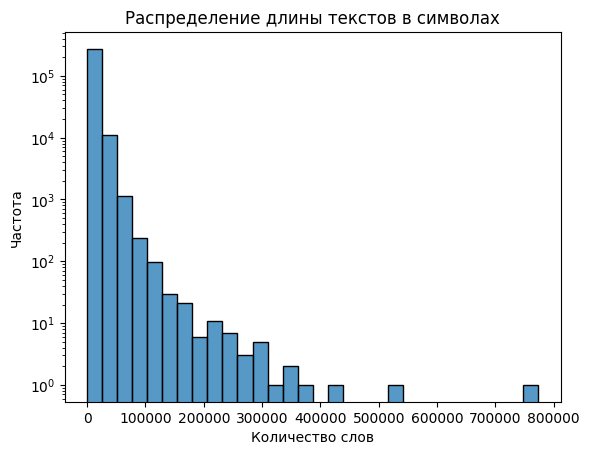

In [ ]:
sns.histplot(df['content_length_chars'], bins=30)
plt.title('Распределение длины текстов в символах')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.yscale("log")
plt.show()

In [ ]:
def clean_text(text):
    # Замена переносов строк на пробелы 
    text = text.replace('\n', ' ')
    # Удаление HTML-тегов
    text = re.sub(r'<.*?>', '', text)
    # Удаление специальных символов, пунктуации
    text = re.sub(r'[^\w\s]', '', text)
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление цифр
    text = re.sub(r'\d+', '', text)
    return text


df["clean_text"] = df["Content"].apply(clean_text)


# Анализ даты публикации

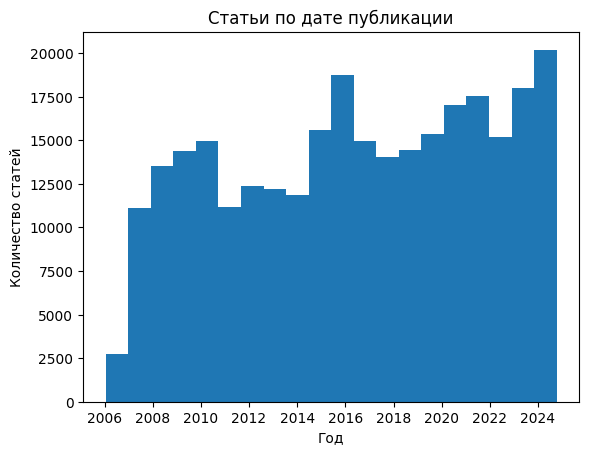

In [ ]:
plt.hist(df['Publication_date'], bins=20)  
plt.xlabel('Год')
plt.ylabel('Количество статей')
plt.title('Статьи по дате публикации')
plt.show()

Мы видим скорее восходящий тред на публикацию статей

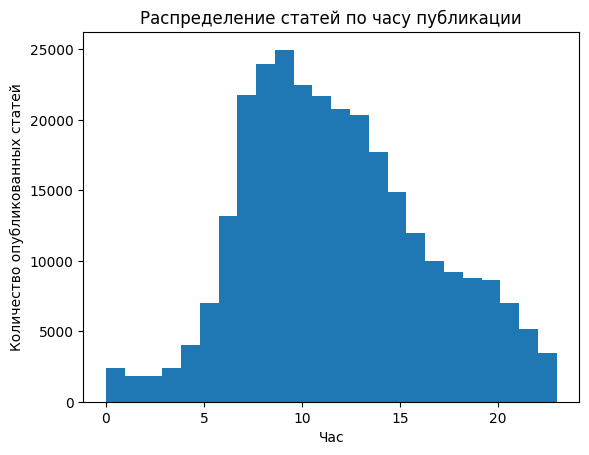

In [ ]:
plt.hist(df['Publication_date'].dt.hour, bins=24)
plt.title('Распределение статей по часу публикации')
plt.ylabel('Количество опубликованных статей')
plt.xlabel('Час')
plt.show()

Видим, что чаще всего статьи публикуют в середине дня

# Анализ заголовков

In [ ]:
df['title_length_chars'] = df['Title'].apply(lambda x: len(x))
df['title_length_words'] = df['Title'].apply(lambda x: len(x.split()))

In [ ]:
df[['title_length_chars', 'title_length_words']].describe()

,title_length_chars,title_length_words
count,285498.000000,285498.000000
mean,52.283322,7.391544
std,23.282337,3.344426
min,0.000000,0.000000
25%,35.000000,5.000000
50%,49.000000,7.000000
75%,67.000000,9.000000
max,219.000000,39.000000


Видим статистике по длине заголовков в словах и в символах

# Распределение классов и меток

In [14]:
df.head()

,Title,Author,Publication_date,Hubs,Tags,Content,Comments,Views,URL,Reading_time,Images_links,Individ/Company,Rating,Positive/Negative,Bookmarks_cnt,content_length_chars,content_length_words
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик.\nТак ка...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0,2108,327
1,Как я работал по два часа в день,Konovalov,2009-07-30 13:50:03+00:00,GTD,"тайм-менеджмент, timemanagement, работа, эффек...",Когда я только перешёл от офисной работы к дом...,99,21000,https://habr.com/ru/articles/65783/,3.0,,individual,193,positive,114.0,4059,635
2,Итоги первой недели,Irokez,2009-05-10 13:43:21+00:00,GTD,"тайм-менеджмент, пинарик, ворктрек","Итак, за прошедшую неделю хабраюзеры попробова...",29,1000,https://habr.com/ru/articles/59272/,1.0,https://habrastorage.org/r/w1560/getpro/megamo...,individual,15,positive,5.0,1593,217
3,Правильно поставленная задача время бережет,object,2009-05-05 00:05:11+00:00,GTD,"постановка задачи, планирование",Хочу поделиться своими мыслями по оптимизации ...,95,18000,https://habr.com/ru/articles/58889/,3.0,,individual,64,positive,75.0,4803,715
4,ChatterBlocker или Вон из моей головы!,waitekk,2009-05-31 20:54:23+00:00,GTD,"chatterblocker, аудио","Как-то привык я к тому, что предметы вокруг ме...",56,5700,https://habr.com/ru/articles/60989/,1.0,http://www.picamatic.com/show/2009/06/01/01/01...,individual,28,positive,33.0,1681,262


In [15]:
tags_count = df['Tags'].str.split(', ').explode().value_counts()

In [16]:
tags_count

Tags
javascript           6065
python               5863
программирование     4826
android              4621
разработка           4358
                     ... 
Radeon RX 5600 XT       1
Ryzen 7 4800U           1
Ryzen 7 4800H           1
udp streaming           1
некопипасть             1
Name: count, Length: 238850, dtype: int64

In [17]:
len(tags_count.index)

238850

Всего у нас получилось 238850 уникальных тэга в статьях. Давайте обрежем сначала совсем непопулярные, чтобы легче было анализировать их и это не повлияло на остальные

In [18]:
tags_count = tags_count[tags_count > 5]
tags_count

Tags
javascript          6065
python              5863
программирование    4826
android             4621
разработка          4358
                    ... 
Corel                  6
typeclasses            6
Dolby Atmos            6
нумерология            6
эрозия                 6
Name: count, Length: 28267, dtype: int64

Итак, сделав фильтр на то, чтобы тег встречался хотя бы в 6 статьях мы уже сократили количество почти в 10 раз

Давайте лемматизируем теги и попробуем найти похожие, тем самым сократив число анализируемых тегов

In [19]:
import spacy
import re
import string

ru_model = spacy.load('ru_core_news_sm', disable = ['parser','ner'])
en_model = spacy.load('en_core_web_sm', disable = ['parser','ner'])

ru_pattern = r'[а-яё]+'
eng_pattern = r'[a-z]+'

def lemmatize_tag(tag: str, ru_lemmatize_model, en_lemmatize_model):
    tag = tag.lower()
    if re.search(ru_pattern, tag):
        return ru_lemmatize_model(tag)[0].lemma_
    elif re.search(eng_pattern, tag):
        return en_lemmatize_model(tag)[0].lemma_
    elif tag.isdigit():
        return tag
    elif tag.replace(".", "").isdigit():
        return tag
    return ""

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
from tqdm import tqdm

canon_mapping = {}
for tag in tqdm(tags_count.index):
    tag = tag.strip()
    lemmatized_tag = " ".join([lemmatize_tag(tag_part, ru_model, en_model) for tag_part in tag.split()])
    canon_mapping[tag] = lemmatized_tag

100%|██████████| 28267/28267 [00:44<00:00, 628.38it/s]


In [35]:
canon_tags = df['Tags'].str.split(', ').explode().apply(lambda x: canon_mapping[x] if x in canon_mapping.keys() else x)

In [57]:
canon_tags_counts = canon_tags.value_counts()
canon_tags_counts = canon_tags_counts[canon_tags_counts > 5]
canon_tags_counts

Tags
javascript                   7133
python                       6594
android                      6053
google                       5817
linux                        5430
                             ... 
голанг                          6
север                           6
сайт для человек                6
суперклей                       6
аутентификация без пароль       6
Name: count, Length: 22275, dtype: int64

In [44]:
from Levenshtein import ratio as levenshtein_distance
import itertools



def find_max_levenshtein_pairs(text_list):    
    max_distance = 0.9
    max_pairs = []

    for text1, text2 in tqdm(itertools.combinations(text_list, 2)):
        dist = levenshtein_distance(text1, text2)
        if dist >= max_distance:
            max_pairs.append((text1, text2))

    return max_pairs

max_pairs = find_max_levenshtein_pairs(canon_tags_counts.index)


248076675it [02:07, 1952691.75it/s]


In [45]:
len(max_pairs), max_pairs[:100]

(1274,
 [('javascript', 'java script'),
  ('javascript', 'javascipt'),
  ('javascript', 'javscript'),
  ('javascript', 'javascrip'),
  ('javascript', 'javacript'),
  ('python', 'python3'),
  ('python', 'cpython'),
  ('python', 'ipython'),
  ('python', 'pyhon'),
  ('python', 'python2'),
  ('android', 'androidx'),
  ('android', 'andoid'),
  ('google', 'google+'),
  ('google', 'igoogle'),
  ('программирование', 'програмирование'),
  ('программирование', 'програмиирование'),
  ('программирование', '1с программирование'),
  ('apple', 'applet'),
  ('информационный безопасность', 'инфомационная безопасность'),
  ('информационный безопасность', 'аудит информационный безопасность'),
  ('конференция', 'конференц'),
  ('open source', 'opensource'),
  ('open source', 'opensorce'),
  ('машинный обучение', 'машинный обучениe'),
  ('тестирование', 'a тестирование'),
  ('тестирование', 'а тестирование'),
  ('искусственный интеллект', 'искуственный интеллект'),
  ('искусственный интеллект', 'исскуствен

На данный момент мы видим, что у нас много тегов, которые мы можем объединить с другими тегами по расстоянию Левенштейна. В последствии мы можем объединять пары выбирая максимально подходящего представителя группы

---------------------